In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather_data = pd.read_csv('weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
weather_data.shape

(145460, 24)

In [4]:
weather_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
weather_data.drop(['Date', 'Location', 'RISK_MM'], axis=1, inplace=True)
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
categorical_features = [x for x in weather_data.columns if weather_data[x].dtype == 'O']

print ("The categorical features are :", categorical_features)

The categorical features are : ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
weather_data[categorical_features].head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,W,W,WNW,No,No
1,WNW,NNW,WSW,No,No
2,WSW,W,WSW,No,No
3,NE,SE,E,No,No
4,W,ENE,NW,No,No


In [9]:
#EDA steps

weather_data[categorical_features].isnull().sum()

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [10]:
for x in categorical_features:
    print (weather_data[x].value_counts())

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64
No     110319
Yes     31880
Name: RainToday, dtype: int64
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


In [11]:
weather_data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
weather_data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
weather_data.drop(['WindDir3pm', 'WindDir9am', 'WindGustDir'], axis =1, inplace=True)
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
# deal with missing data in numerical columns

numerical_features = [x for x in weather_data.columns if weather_data[x].dtype != 'O']
print (numerical_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [20]:
weather_data[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [21]:
print (round(weather_data[numerical_features].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'Cloud3pm')

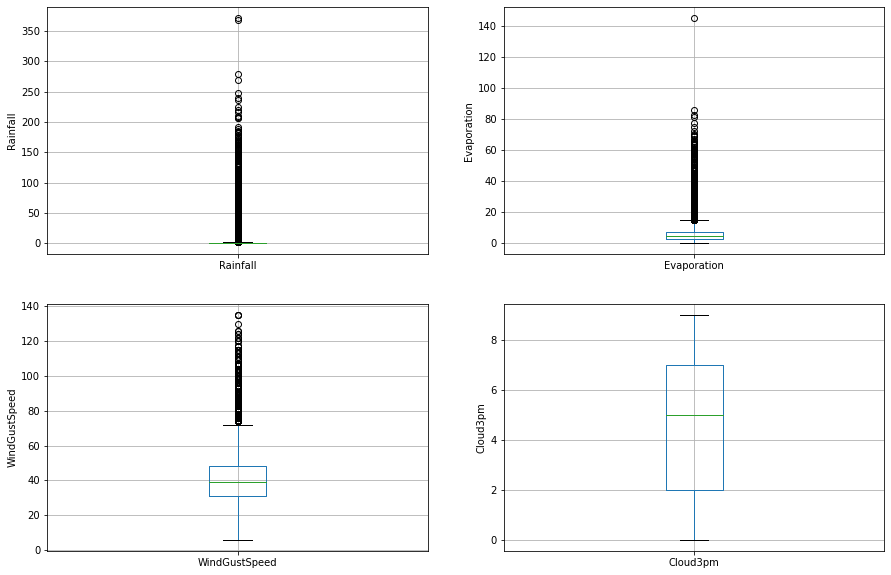

In [23]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = weather_data.boxplot(column='Rainfall')
fig.set_ylabel('Rainfall')


plt.subplot(2,2,2)
fig = weather_data.boxplot(column='Evaporation')
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig = weather_data.boxplot(column='WindGustSpeed')
fig.set_ylabel('WindGustSpeed')

plt.subplot(2,2,4)
fig = weather_data.boxplot(column='Cloud3pm')
fig.set_ylabel('Cloud3pm')


Text(0, 0.5, 'Rainfall Tomorrow')

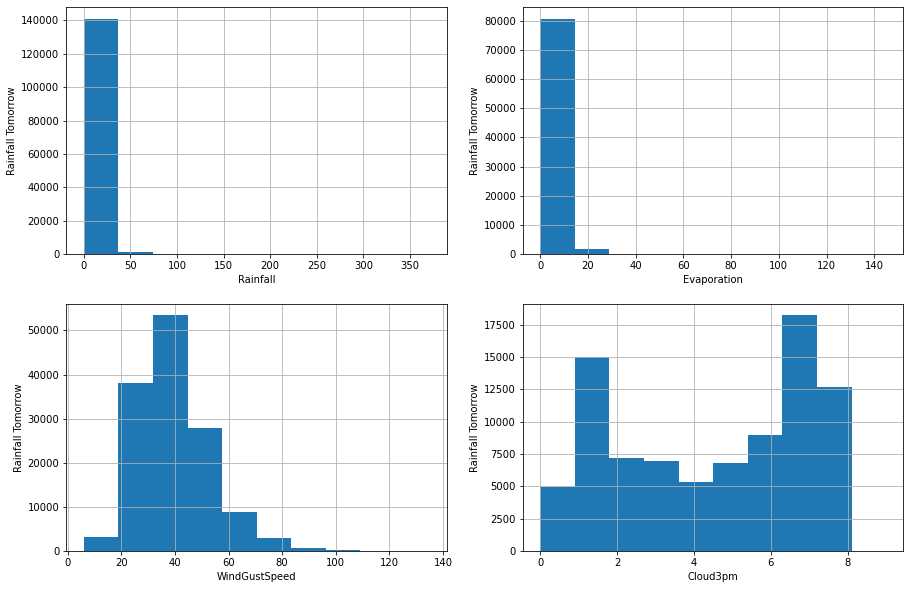

In [25]:
# Plot the distribution

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = weather_data.Rainfall.hist(bins = 10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('Rainfall Tomorrow')


plt.subplot(2,2,2)
fig = weather_data.Evaporation.hist(bins = 10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('Rainfall Tomorrow')

plt.subplot(2,2,3)
fig = weather_data.WindGustSpeed.hist(bins = 10)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('Rainfall Tomorrow')

plt.subplot(2,2,4)
fig = weather_data.Cloud3pm.hist(bins = 10)
fig.set_xlabel('Cloud3pm')
fig.set_ylabel('Rainfall Tomorrow')


In [ ]:
# outlier removal using IQR 
Q3 = weather_data.Rainfall.quantile(0.75)
Q1 = weather_data.Rainfall.quantile(0.25)

IQR = Q3 - Q1
Lower_boundary = Q1 - 1.5* IQR
Upper_boundary = Q3 + 1.5* IQR

# To do  

# remove the outlier value altogether (rows in which the values of the 
# numerical columns are exceeding the IQR limits)

# replace 'Nan' with median of the column

In [ ]:
# drop any row for which data is missing in categorical features
# Convert Yes = 1, NO = 0. A simple label encoding



In [ ]:
# optionally one could scale the numerical data.
# A sample code

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# features_tf = Scaler.fit_transform(features)

# features_tf will have all the numerical data scaled between 0 to 1

In [ ]:
# Separate X and Y

In [ ]:
# Train test separation

# Run Logistic regression. Try with different hyper parameters

# predict outcome for test data

# Return acc, precision, recall, f1 score and classification report